In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./ingredients_clustering.csv")
df

,title,ingredients_list,prep
0,Rainbow Rice,carrot ribbons frozen peas red cabbage yellow ...,cook the rice as instructed on the packaging.w...
1,Nachos,meatless farm co mince can of refried beans c...,preheat the oven to 350ºf heat the oil in a la...
2,Hazelnut Truffles,hazelnuts cacao hemp protein powder agave alm...,preheat the oven to 200c put the hazelnuts in ...
3,Simple Roasted Radish by ChicP,tub beetroot and horseradish houmous mixed ra...,pre heat the oven to 160°c cut the radishes in...
4,Baked Apple Charlotte,rapeseed oil pitted dates bramley apples that...,serves 9 you will need an 8inch/23cm square ba...
...,...,...,...
832,Vegan Baked Blender Choc Oats,glutenfree oats plantbased milk the coconut c...,1. preheat the oven to 180 degrees. 2. blend a...
833,Rainbow Veg Rolls with Peanut Dipping Sauce,dried cellophane noodles sesame oil pack rice...,1. start by making the peanut sauce. measure a...
834,Chickpea Chilli Burgers,rolled instant oats red chillies deseeded red...,"in a food processor or blender, mix together t..."
835,Vegan Pesto Pasta,pesto pine nuts olive oil handful of kale ...,roast the pine nuts in a hot pan until toasted...


### ingredients 토큰화

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string
# nltk.download()


#string.puncutation에 문자열의 모든 구두점이 들어있음 (!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~)
#이를 활용해서 Tokenize시킬 때 구두점을 제외하기 위한 것
#ord('문자열') => 문자열의 ASCII 코드를 반환
#dict(key, value) 형태로 모든 구두점의 각 ASCII 코드를 key 값으로 넣어주기

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()
remove_punct_dict # 모든 구두점들을 아스키코드로 변환한 것

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

### 토큰화를 통한 어근 추출

In [4]:
# 토큰화한 각 단어들의 원형들을 리스트로 담아서 반환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 텍스트를 input으로 넣어서 토큰화시키고 토근화된 단어들의 원형들을 리스트로 담아 반환
def LemNormalize(text):
    # .translate 인자에 구두점 dict 넣어주어서 구두점 삭제해준 상태로 토큰화 시키기
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

### TF-IDF 기반 단어 벡터화 시켜 Feature 만들기

In [5]:
# Tf-idf 벡터화시키면서 customized해준 토큰화+어근 추출 방식 tokenizer 인자(LemNormalize)에 넣어주기
# 벡터화 시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram 적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                            stop_words='english', ngram_range=(1,2),
                            min_df=0.05, max_df=0.40)

# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화 (Feature vector)
ftr_vect = tfidf_vect.fit_transform(df['ingredients_list'])

C:\Users\miming\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


### K-means 알고리즘으로 문서 군집화 

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=22, max_iter=10000, random_state=42, init="k-means++")

# 비지도 학습이므로 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블 값들을 df에 추가하기
df["cluster_label"] = cluster_label
df.sort_values(by=['cluster_label'])

,title,ingredients_list,prep,cluster_label
663,Roast Vegetable Pizza,flora freedom selfraising wholemeal flour bak...,"preheat oven to 200° c, 180° c fan, gas mark 6...",0
93,Mushroom and Chestnut Wellington,mushroom and chestnut wellington chestnut mush...,begin by cooking your chestnuts.whilst your ch...,0
308,Sweet Chilli Relish,dried ancho poblano chillies with seeds roast...,makes 1 large jar equipmentmeasuring cups & sp...,0
770,Pomegranate and Thyme Mocktail,pomegranate satsumas lime several sprigs of t...,"juice the pomegranate, satsumas and lime and p...",0
673,"Avocado, Tomato and Marmite on Toast",toasted bread fresh tomatoes ripe avocado marm...,toast your bread spread with vegan marge and m...,0
...,...,...,...,...
523,Easy Peasy Banana Ice Cream,large bananas plant milk chocolate for meltin...,special thanks to victoria harley for the imag...,21
511,Winter Spiced Carrot Smoothie,peeled and cut carrots soy milk of cinnamon p...,place all ingredients into a blender and blend...,21
730,Low Sugar Raspberry Chia Jam,raspberries fresh or frozen coconut water or ...,place all of the ingredients in a small pan an...,21
680,Super Green Detox Smoothie by Christine Bailey,large handful of spinach or chopped kale leave...,place all the ingredients in a blender and pro...,21


### 클러스터링 완료 후 cluster_label 컬럼 추가 csv파일 추출

In [26]:
df.to_csv('add_cluster_label.csv', index=False)

### 각 클러스터 중심 좌표 반환하여 핵심 단어 추출

In [7]:
# 문서의 feature(단어 별) cluster_centers 확인하기
cluster_centers = kmeans.cluster_centers_
cluster_centers.shape # (클러스터 레이블, feature 단어들) => 클러스터 개수, 클러스터 중 최대 feature단어의 개수?

(22, 164)

In [8]:
# 각 feature와 클러스터 중심간의 상대적인 위치값들
cluster_centers # 중간에 0.    는 무엇? rows의 개수를 맞추기 위해서?

array([[0.01603091, 0.00721288, 0.01854314, ..., 0.04050403, 0.02514821,
        0.00600986],
       [0.05173185, 0.05834777, 0.        , ..., 0.        , 0.        ,
        0.01398818],
       [0.01071201, 0.00724003, 0.02167631, ..., 0.01125629, 0.00483222,
        0.0320379 ],
       ...,
       [0.        , 0.01842598, 0.        , ..., 0.01321816, 0.        ,
        0.02495364],
       [0.        , 0.1096607 , 0.01226109, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03861448, 0.03887604, ..., 0.        , 0.        ,
        0.01271515]])

### feature의 좌표를 이용한 클러스터 당 핵심 단어 추출

In [9]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    # cluster_model = kmeans로 사용할 것이므로 위에서 테스트 했던 대로 cluster_centers_를 이용하면 상대 좌표가 나옴
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    # print(center_feature_idx) 
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
    
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        #print(cluster_details) #{0: {'cluster': 0}}
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 5개만 추출 top_n_features = 5
        # feature_names : feature 단어들을 추출한 것
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features] # 상위 5개 인덱스 번호
        top_ftr = [feature_names[idx] for idx in top_ftr_idx] # 상위 5개 feature 단어

        
        # top_ftr_idx를 활용해서 상위 5개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr # 상위 5개 feature 단어
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val # 상위 5개 중심으로부터 상대 좌표
        
        # 해당 cluster_num으로 분류된 메뉴명 넣어주기
        title_names = cluster_data[cluster_data['cluster_label']==cluster_num]['title'] 
        #df[df['cluster_label']==cluster_num]['title']
        
        # title_names가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        title_names = title_names.values.tolist()
        cluster_details[cluster_num]['title_names'] = title_names

    return cluster_details
        

In [10]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 5개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 레시피들:\n{cluster_detail['title_names'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=df,
                                     feature_names=feature_names,
                                     cluster_num=22,
                                     top_n_features=5) #상위 10개 feature 추출하는게 디폴트이지만 5개만 추출
print_cluster_details(cluster_details)


#####Cluster Num: 0

상위 5개 feature단어들:
 ['tomato', 'dried', 'fresh', 'bread', 'clove garlic']

Cluster 0으로 분류된 레시피들:
['Chilli Vegetable Pizza', 'Vegan Full English Breakfast', 'Non-Dairy Garlic Herb Gournay', 'Lentil Bolognese', 'Puy Lentil Shepherd’s Pie']
--------------------
#####Cluster Num: 1

상위 5개 feature단어들:
 ['chocolate', 'dark', 'dark chocolate', 'cocoa', 'sugar']

Cluster 1으로 분류된 레시피들:
['Nutty Chocolate Truffles', 'Vegan Double Dark Chocolate Ice Cream', 'Christmas Pud Ice Cream', 'Nākd Chocolate Orange Cake Pops', 'Vegan ‘Rolo’ Chocolates']
--------------------
#####Cluster Num: 2

상위 5개 feature단어들:
 ['lemon', 'olive', 'olive oil', 'juice', 'lemon juice']

Cluster 2으로 분류된 레시피들:
['Avocado on Toast', 'Roasted Pumpkin Macaroni', 'Baked Buckwheat with Tomatoes', 'Vegan Lobster Rolls', 'Garlic Courgette Bruschetta']
--------------------
#####Cluster Num: 3

상위 5개 feature단어들:
 ['diced', 'red', 'chopped', 'onion', 'pepper']

Cluster 3으로 분류된 레시피들:
['Nachos', 'Mexican Bean Lasagne',

C:\Users\miming\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 문서들간의 유사도 측정

단어들을 feature화 시킬 땐 음수값이 나올 수 없으므로 Cosine 180도인 경우는 존재하지 않는다. 즉 단어 벡터간의 유사도는 0~1사이의 값으로 나온다.

In [11]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

# 초콜릿 카테고리 cluster_num = 1 
choco_idx = df[df['cluster_label']==1].index
print("chocolate 카테고리로 클러스터링된 레시피들의 인덱스:\n", choco_idx)
print()

# 초콜렛 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
compare_recipe = df.iloc[choco_idx[0]]['title']
print('##유사도 비교 기준 문서 이름: ', compare_recipe, '##')
print()

# 위에서 추출한 초콜렛 카테고리로 클러스터링된 문서들의 인덱스 중 0번 인덱스(비교기준문서) 제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[choco_idx[0]], ftr_vect[choco_idx])
print(similarity)

chocolate 카테고리로 클러스터링된 레시피들의 인덱스:
 Int64Index([ 19,  66, 151, 154, 209, 222, 246, 265, 296, 379, 449, 458, 559,
            580, 602, 608, 625, 708, 736, 743, 814, 823, 830],
           dtype='int64')

##유사도 비교 기준 문서 이름:  Nutty Chocolate Truffles ##

[[1.         0.47316492 0.22494775 0.37675479 0.11564258 0.43818299
  0.24871325 0.49263908 0.59809747 0.30874381 0.63475649 0.22401399
  0.3958841  0.48392699 0.51774299 0.40164047 0.46427912 0.45233545
  0.45511022 0.28140262 0.44137507 0.23886918 0.35063058]]


In [32]:
cluster_8 = df.loc[choco_idx,['ingredients_list']]
cluster_8

,ingredients_list
19,ground almonds peanut butter maple syrup or a...
66,cashews good quality cocoa powder warm water ...
143,oatmeal cookie base ingredients cups jumbo oat...
154,nkd cocoa orange bars dark chocolate zest of ...
207,ground almonds sea salt baking powder grapese...
222,chocolate nests bar barocco choco dark chocola...
246,for the coconut whip coconut cream peppermint ...
254,grape sweetened or unsweetened almond milk sm...
265,popped amaranth or puffed oats desiccated coc...
282,of dates of raw almonds of cocoa powder groun...


### 유사도 시각화 하기

choco_sorted_idx:  296
Int64Index([449, 296, 602, 265, 580,  66, 625, 736, 708, 814, 222, 608, 559,
            154, 830, 379, 743, 246, 823, 151, 458, 209],
           dtype='int64')
[0.63475649 0.59809747 0.51774299 0.49263908 0.48392699 0.47316492
 0.46427912 0.45511022 0.45233545 0.44137507 0.43818299 0.40164047
 0.3958841  0.37675479 0.35063058 0.30874381 0.28140262 0.24871325
 0.23886918 0.22494775 0.22401399 0.11564258]

길이 비교 22 22



Text(0.5, 1.0, 'Nutty Chocolate Truffles')

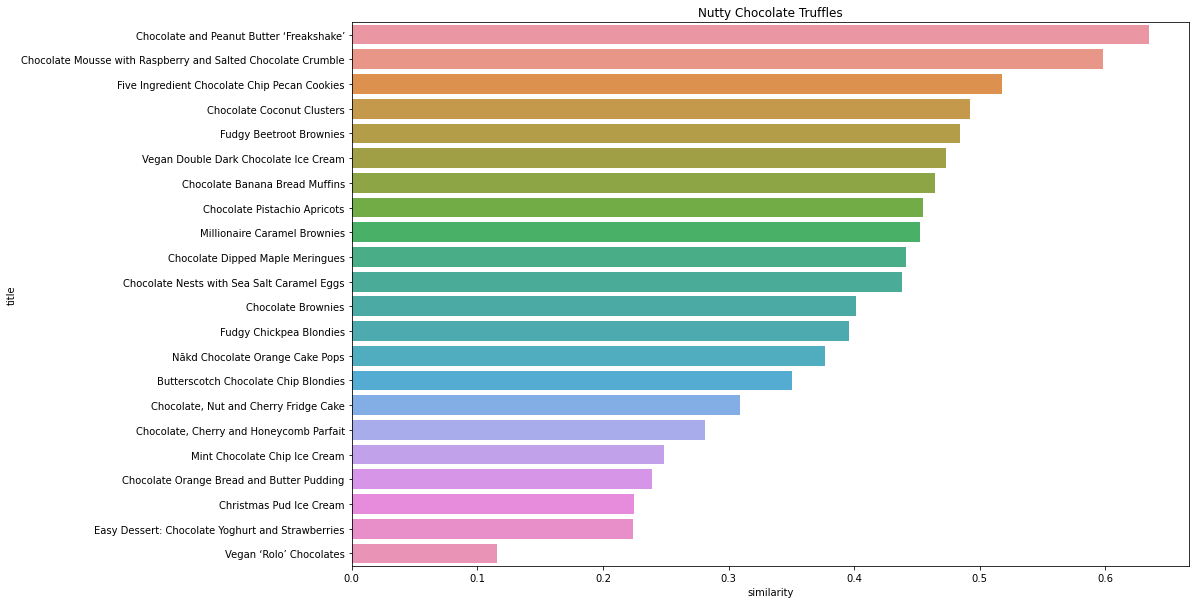

In [13]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든 행에 대해서 열을 내림차순
sorted_idx = similarity.argsort()[:,::-1]

# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]
# print("sorted_idx: ", sorted_idx)

# 유사도가 큰 순으로 choco_idx(label=8인 즉, 초콜릿과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
choco_sorted_idx = choco_idx[sorted_idx.reshape(-1,)]
print("choco_sorted_idx: ", choco_sorted_idx[1])

# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
choco_sim_values = np.sort(similarity.reshape(-1,))[::-1]
choco_sim_values = choco_sim_values[1:]

# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(choco_sorted_idx)
print(choco_sim_values)
print()
print("길이 비교", len(choco_sorted_idx), len(choco_sim_values))
print()

# 빈 데이터프레임 생성
choco_sim_df = pd.DataFrame()
# choco_sorted_idx 와 choco_sim_values 매핑시킨 array임
choco_sim_df['title'] = df.iloc[choco_sorted_idx]['title']
choco_sim_df['similarity'] = choco_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=choco_sim_df, x='similarity', y='title')
plt.title(compare_recipe)

### ingredient를 기준이 아닌 preparation으로 문서 유사도를 구해도 비슷한 결과일까?

In [14]:
# preparation에서 feature vector 구하기
ftr_vect_prep = tfidf_vect.fit_transform(df['prep'])

similarity_prep = cosine_similarity(ftr_vect_prep[choco_idx[0]], ftr_vect_prep[choco_idx])
print(similarity_prep)

[[1.         0.22437886 0.08997222 0.28919941 0.24267209 0.54319829
  0.11790008 0.18177433 0.16909706 0.26838088 0.46703318 0.
  0.2235041  0.12593272 0.32253011 0.33843807 0.32854557 0.30281806
  0.39100915 0.1344855  0.39757148 0.32049326 0.15433285]]


Int64Index([222, 449, 814, 736, 608, 625, 602, 823, 708, 154, 379, 209,  66,
            559, 265, 296, 830, 743, 580, 246, 151, 458],
           dtype='int64')
[0.54319829 0.46703318 0.39757148 0.39100915 0.33843807 0.32854557
 0.32253011 0.32049326 0.30281806 0.28919941 0.26838088 0.24267209
 0.22437886 0.2235041  0.18177433 0.16909706 0.15433285 0.1344855
 0.12593272 0.11790008 0.08997222 0.        ]

길이 비교 22 22



Text(0.5, 1.0, 'Nutty Chocolate Truffles')

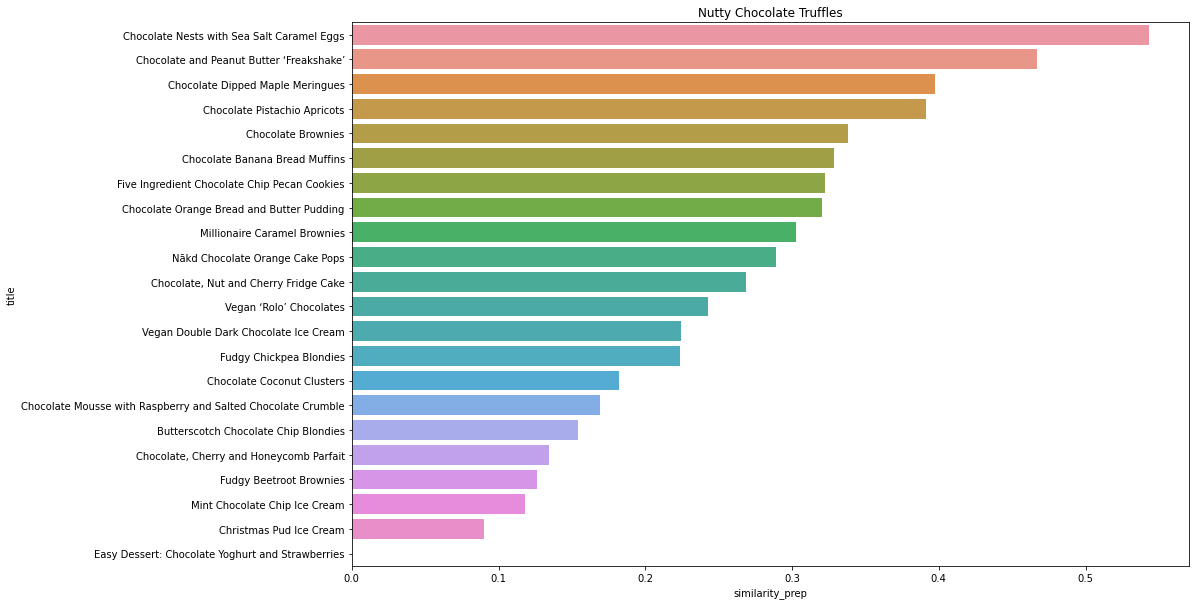

In [15]:
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든 행에 대해서 열을 내림차순
prep_sorted_idx = similarity_prep.argsort()[:,::-1]

# 비교문서 당사자는 제외한 인덱스 추출
prep_sorted_idx = prep_sorted_idx[:, 1:]

#1차원으로 reshape
choco_prep_sorted_idx = choco_idx[prep_sorted_idx.reshape(-1,)]

# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
choco_prep_sim_values = np.sort(similarity_prep.reshape(-1,))[::-1]
choco_prep_sim_values = choco_prep_sim_values[1:]

# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(choco_prep_sorted_idx)
print(choco_prep_sim_values)
print()
print("길이 비교", len(choco_prep_sorted_idx), len(choco_prep_sim_values))
print()

# 빈 데이터프레임 생성
choco_prep_sim_df = pd.DataFrame()

# choco_prep_sorted_idx 와 choco_prep_sim_values 매핑시킨 array
choco_prep_sim_df['title'] = df.iloc[choco_prep_sorted_idx]['title']
choco_prep_sim_df['similarity_prep'] = choco_prep_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=choco_prep_sim_df, x='similarity_prep', y='title')
plt.title(compare_recipe)

### 결론
재료가 비슷한 클러스터로 묶였기 때문에 prep을 기준으로 유사도를 검사했을 땐, 재료의 유사성과 조리법의 유사도 둘 다 비슷한 레시피가 나오는것 같다. 

하지만 여기서 고민해 봐야할 점은 레시피 추천 시스템을 만들기 위해서 과연 유저가 1) **비슷한 재료를 가지고 비슷한 음식을 만들기**를 원할지, 또는 2) **비슷한 재료를 가지고 다른 종류의 음식**을 만들기를 원할 것 인지이다.

추가로 현재 초콜릿 카테고리에 대해서만 실험해보았지만 다른 카테고리에서도 잘 분류를 하는지에 대한 추가 실험이 필요할 것 같다.